In [2]:
import pandas as pd 
import numpy as np

import string
import re   
import nltk
from nltk.corpus import stopwords

from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from textblob import TextBlob

In [3]:
df = pd.read_csv("E:/Userfiles/Download/archive/Tamil_sentiments.csv",on_bad_lines='skip', sep = "\t", names= ['Labels', 'Comments'])
df

Labels                                           Comments
0            Negative                Enna da ellam avan seyal  Mari iruku
1            Negative           This movei is just like  ellam avan seyal
2            Positive    Padam vanthathum 13k dislike pottavaga yellam...
3            Positive     Neraya neraya neraya... ... V era level...thala
4            Positive    wow thavala sema mass....padam oru pundaikum ...
...                ...                                                ...
15739  Mixed_feelings    ivaru cinemala laam nalla tha prasuraaru...aa...
15740        Positive    Pattaya Kilaputhupaa trailer... !!!!! Get Raj...
15741  Mixed_feelings    En innum trending la varala? Ennada panringa ...
15742       not-Tamil          Rajnikant sir plz aap india ke pm ban jaao
15743  Mixed_feelings    Enagada YouTube inum trending la add panama i...

[15744 rows x 2 columns]

In [4]:
df.columns

Index(['Labels', 'Comments'], dtype='object')

In [5]:
data= df.drop(['Labels'], 1)

C:\Users\Priya\AppData\Local\Temp\ipykernel_6556\804849033.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data= df.drop(['Labels'], 1)


In [6]:
data.isnull().sum()

Comments    0
dtype: int64

In [7]:
data.shape

(15744, 1)

In [8]:
stemmer_func = nltk.stem.snowball.SnowballStemmer("english").stem

In [9]:
lemmatizer = WordNetLemmatizer()

In [10]:
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Priya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
def pre_process(text):
    text = str(text).lower()
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stop]
    text=" ".join(text)
    text = [stemmer_func(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [12]:
data['clean_text'] = data['Comments'].apply(lambda x: pre_process(x))

In [13]:
data

Comments  \
0                   Enna da ellam avan seyal  Mari iruku   
1              This movei is just like  ellam avan seyal   
2       Padam vanthathum 13k dislike pottavaga yellam...   
3        Neraya neraya neraya... ... V era level...thala   
4       wow thavala sema mass....padam oru pundaikum ...   
...                                                  ...   
15739   ivaru cinemala laam nalla tha prasuraaru...aa...   
15740   Pattaya Kilaputhupaa trailer... !!!!! Get Raj...   
15741   En innum trending la varala? Ennada panringa ...   
15742         Rajnikant sir plz aap india ke pm ban jaao   
15743   Enagada YouTube inum trending la add panama i...   

                                              clean_text  
0                   enna da ellam avan seyal  mari iruku  
1                           movei like  ellam avan seyal  
2       padam vanthathum k dislik pottavaga yellam ye...  
3                 neraya neraya neraya  v era levelthala  
4       wow thavala sema masspadam oru pundaikum aagathu  
...                                                  ...  
15739   ivaru cinemala laam nalla tha prasuraaruaana ...  
15740        pattaya kilaputhupaa trailer  get rajnifi    
15741   en innum trend la varala ennada panringa yout...  
15742            rajnik sir plz aap india ke pm ban jaao  
15743   enagada youtub inum trend la add panama irukinga  

[15744 rows x 2 columns]

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Priya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
data['token_text'] = data['clean_text'].apply(word_tokenize)

In [16]:
data

Comments  \
0                   Enna da ellam avan seyal  Mari iruku   
1              This movei is just like  ellam avan seyal   
2       Padam vanthathum 13k dislike pottavaga yellam...   
3        Neraya neraya neraya... ... V era level...thala   
4       wow thavala sema mass....padam oru pundaikum ...   
...                                                  ...   
15739   ivaru cinemala laam nalla tha prasuraaru...aa...   
15740   Pattaya Kilaputhupaa trailer... !!!!! Get Raj...   
15741   En innum trending la varala? Ennada panringa ...   
15742         Rajnikant sir plz aap india ke pm ban jaao   
15743   Enagada YouTube inum trending la add panama i...   

                                              clean_text  \
0                   enna da ellam avan seyal  mari iruku   
1                           movei like  ellam avan seyal   
2       padam vanthathum k dislik pottavaga yellam ye...   
3                 neraya neraya neraya  v era levelthala   
4       wow thavala sema masspadam oru pundaikum aagathu   
...                                                  ...   
15739   ivaru cinemala laam nalla tha prasuraaruaana ...   
15740        pattaya kilaputhupaa trailer  get rajnifi     
15741   en innum trend la varala ennada panringa yout...   
15742            rajnik sir plz aap india ke pm ban jaao   
15743   enagada youtub inum trend la add panama irukinga   

                                              token_text  
0            [enna, da, ellam, avan, seyal, mari, iruku]  
1                      [movei, like, ellam, avan, seyal]  
2      [padam, vanthathum, k, dislik, pottavaga, yell...  
3           [neraya, neraya, neraya, v, era, levelthala]  
4      [wow, thavala, sema, masspadam, oru, pundaikum...  
...                                                  ...  
15739  [ivaru, cinemala, laam, nalla, tha, prasuraaru...  
15740     [pattaya, kilaputhupaa, trailer, get, rajnifi]  
15741  [en, innum, trend, la, varala, ennada, panring...  
15742  [rajnik, sir, plz, aap, india, ke, pm, ban, jaao]  
15743  [enagada, youtub, inum, trend, la, add, panama...  

[15744 rows x 3 columns]

In [17]:
def lemma(text):
    lemma_token = " "
    for word in text:
        lemma = word
        lemma_token = lemma_token + " " + lemma
    return lemma_token

In [18]:
data['Lemma_text'] = data['token_text'].apply(lemma)
data.head()

Comments  \
0               Enna da ellam avan seyal  Mari iruku   
1          This movei is just like  ellam avan seyal   
2   Padam vanthathum 13k dislike pottavaga yellam...   
3    Neraya neraya neraya... ... V era level...thala   
4   wow thavala sema mass....padam oru pundaikum ...   

                                          clean_text  \
0               enna da ellam avan seyal  mari iruku   
1                       movei like  ellam avan seyal   
2   padam vanthathum k dislik pottavaga yellam ye...   
3             neraya neraya neraya  v era levelthala   
4   wow thavala sema masspadam oru pundaikum aagathu   

                                          token_text  \
0        [enna, da, ellam, avan, seyal, mari, iruku]   
1                  [movei, like, ellam, avan, seyal]   
2  [padam, vanthathum, k, dislik, pottavaga, yell...   
3       [neraya, neraya, neraya, v, era, levelthala]   
4  [wow, thavala, sema, masspadam, oru, pundaikum...   

                                          Lemma_text  
0                enna da ellam avan seyal mari iruku  
1                        movei like ellam avan seyal  
2    padam vanthathum k dislik pottavaga yellam y...  
3              neraya neraya neraya v era levelthala  
4    wow thavala sema masspadam oru pundaikum aag...

In [19]:
## Sentimental Analysis

In [20]:
data['textblob_sentiment_polarity'] = data["Lemma_text"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [21]:
data

Comments  \
0                   Enna da ellam avan seyal  Mari iruku   
1              This movei is just like  ellam avan seyal   
2       Padam vanthathum 13k dislike pottavaga yellam...   
3        Neraya neraya neraya... ... V era level...thala   
4       wow thavala sema mass....padam oru pundaikum ...   
...                                                  ...   
15739   ivaru cinemala laam nalla tha prasuraaru...aa...   
15740   Pattaya Kilaputhupaa trailer... !!!!! Get Raj...   
15741   En innum trending la varala? Ennada panringa ...   
15742         Rajnikant sir plz aap india ke pm ban jaao   
15743   Enagada YouTube inum trending la add panama i...   

                                              clean_text  \
0                   enna da ellam avan seyal  mari iruku   
1                           movei like  ellam avan seyal   
2       padam vanthathum k dislik pottavaga yellam ye...   
3                 neraya neraya neraya  v era levelthala   
4       wow thavala sema masspadam oru pundaikum aagathu   
...                                                  ...   
15739   ivaru cinemala laam nalla tha prasuraaruaana ...   
15740        pattaya kilaputhupaa trailer  get rajnifi     
15741   en innum trend la varala ennada panringa yout...   
15742            rajnik sir plz aap india ke pm ban jaao   
15743   enagada youtub inum trend la add panama irukinga   

                                              token_text  \
0            [enna, da, ellam, avan, seyal, mari, iruku]   
1                      [movei, like, ellam, avan, seyal]   
2      [padam, vanthathum, k, dislik, pottavaga, yell...   
3           [neraya, neraya, neraya, v, era, levelthala]   
4      [wow, thavala, sema, masspadam, oru, pundaikum...   
...                                                  ...   
15739  [ivaru, cinemala, laam, nalla, tha, prasuraaru...   
15740     [pattaya, kilaputhupaa, trailer, get, rajnifi]   
15741  [en, innum, trend, la, varala, ennada, panring...   
15742  [rajnik, sir, plz, aap, india, ke, pm, ban, jaao]   
15743  [enagada, youtub, inum, trend, la, add, panama...   

                                              Lemma_text  \
0                    enna da ellam avan seyal mari iruku   
1                            movei like ellam avan seyal   
2        padam vanthathum k dislik pottavaga yellam y...   
3                  neraya neraya neraya v era levelthala   
4        wow thavala sema masspadam oru pundaikum aag...   
...                                                  ...   
15739    ivaru cinemala laam nalla tha prasuraaruaana...   
15740           pattaya kilaputhupaa trailer get rajnifi   
15741    en innum trend la varala ennada panringa you...   
15742            rajnik sir plz aap india ke pm ban jaao   
15743    enagada youtub inum trend la add panama iruk...   

       textblob_sentiment_polarity  
0                              0.0  
1                              0.0  
2                              0.0  
3                              0.0  
4                              0.1  
...                            ...  
15739                          0.0  
15740                          0.0  
15741                          0.0  
15742                          0.0  
15743                          0.0  

[15744 rows x 5 columns]

In [22]:
data['textblob_sentiment_subjectivity'] = data["Lemma_text"].apply(lambda x: TextBlob(x).sentiment.subjectivity )
data

Comments  \
0                   Enna da ellam avan seyal  Mari iruku   
1              This movei is just like  ellam avan seyal   
2       Padam vanthathum 13k dislike pottavaga yellam...   
3        Neraya neraya neraya... ... V era level...thala   
4       wow thavala sema mass....padam oru pundaikum ...   
...                                                  ...   
15739   ivaru cinemala laam nalla tha prasuraaru...aa...   
15740   Pattaya Kilaputhupaa trailer... !!!!! Get Raj...   
15741   En innum trending la varala? Ennada panringa ...   
15742         Rajnikant sir plz aap india ke pm ban jaao   
15743   Enagada YouTube inum trending la add panama i...   

                                              clean_text  \
0                   enna da ellam avan seyal  mari iruku   
1                           movei like  ellam avan seyal   
2       padam vanthathum k dislik pottavaga yellam ye...   
3                 neraya neraya neraya  v era levelthala   
4       wow thavala sema masspadam oru pundaikum aagathu   
...                                                  ...   
15739   ivaru cinemala laam nalla tha prasuraaruaana ...   
15740        pattaya kilaputhupaa trailer  get rajnifi     
15741   en innum trend la varala ennada panringa yout...   
15742            rajnik sir plz aap india ke pm ban jaao   
15743   enagada youtub inum trend la add panama irukinga   

                                              token_text  \
0            [enna, da, ellam, avan, seyal, mari, iruku]   
1                      [movei, like, ellam, avan, seyal]   
2      [padam, vanthathum, k, dislik, pottavaga, yell...   
3           [neraya, neraya, neraya, v, era, levelthala]   
4      [wow, thavala, sema, masspadam, oru, pundaikum...   
...                                                  ...   
15739  [ivaru, cinemala, laam, nalla, tha, prasuraaru...   
15740     [pattaya, kilaputhupaa, trailer, get, rajnifi]   
15741  [en, innum, trend, la, varala, ennada, panring...   
15742  [rajnik, sir, plz, aap, india, ke, pm, ban, jaao]   
15743  [enagada, youtub, inum, trend, la, add, panama...   

                                              Lemma_text  \
0                    enna da ellam avan seyal mari iruku   
1                            movei like ellam avan seyal   
2        padam vanthathum k dislik pottavaga yellam y...   
3                  neraya neraya neraya v era levelthala   
4        wow thavala sema masspadam oru pundaikum aag...   
...                                                  ...   
15739    ivaru cinemala laam nalla tha prasuraaruaana...   
15740           pattaya kilaputhupaa trailer get rajnifi   
15741    en innum trend la varala ennada panringa you...   
15742            rajnik sir plz aap india ke pm ban jaao   
15743    enagada youtub inum trend la add panama iruk...   

       textblob_sentiment_polarity  textblob_sentiment_subjectivity  
0                              0.0                              0.0  
1                              0.0                              0.0  
2                              0.0                              0.0  
3                              0.0                              0.0  
4                              0.1                              1.0  
...                            ...                              ...  
15739                          0.0                              0.0  
15740                          0.0                              0.0  
15741                          0.0                              0.0  
15742                          0.0                              0.0  
15743                          0.0                              0.0  

[15744 rows x 6 columns]

In [23]:
def sentiment_analysis(polarity):
    if polarity < 0:
        return 'Negative'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [24]:
data['sentiment_textblob'] = data['textblob_sentiment_polarity'].apply(sentiment_analysis)

In [25]:
data[['Comments', 'textblob_sentiment_polarity','sentiment_textblob']].head(20)

Comments  \
0                Enna da ellam avan seyal  Mari iruku   
1           This movei is just like  ellam avan seyal   
2    Padam vanthathum 13k dislike pottavaga yellam...   
3     Neraya neraya neraya... ... V era level...thala   
4    wow thavala sema mass....padam oru pundaikum ...   
5    Andha 19 k unlike panavangaluku kolandha pora...   
6    Yaarellam frst like pottutu video paaka start...   
7    Ethana padam vanthanu SALT AND PEPPER Mattum ...   
8         Thala mass  Hvy sprt kerala Surya anna fans   
9                    Elam avan jayal movie  remake pa   
10   Dhayavasenju indha padathula mass ila mayiru ...   
11   vera lvl.... Thala sammaaaaaaaaaaaaa......Bgm...   
12   Romba nal aparam ajith ah normal ah pakaran s...   
13               Nirav shah ....  Love u ma dear.....   
14   Padam hit nu nenaikkuravange like podunge ......   
15   Thevdiya pasangala intha trailer ku enna da k...   
16   Dislikes podura thevidiya kandara oooooooli p...   
17   Neenga viswasam ah irukkurathukku mathavangal...   
18   Superb thala... By thalapathy fan... Naraya n...   
19   Last dialogue  epo ellam may epd than jalra t...   

    textblob_sentiment_polarity sentiment_textblob  
0                          0.00            Neutral  
1                          0.00            Neutral  
2                          0.00            Neutral  
3                          0.00            Neutral  
4                          0.10           Positive  
5                          0.00            Neutral  
6                          0.00            Neutral  
7                          0.00            Neutral  
8                          0.00            Neutral  
9                          0.00            Neutral  
10                         0.00            Neutral  
11                         0.00            Neutral  
12                         0.15           Positive  
13                         0.50           Positive  
14                         0.00            Neutral  
15                         0.00            Neutral  
16                         0.00            Neutral  
17                         0.00            Neutral  
18                         1.00           Positive  
19                         0.00            Neutral

In [26]:
def sentiment_analysis(subjectivity):
    if subjectivity < 0:
        return 'Negative'
    elif subjectivity == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [27]:
data['sentiment_textblob_sub'] = data['textblob_sentiment_subjectivity'].apply(sentiment_analysis)

In [28]:
Subjectivity = data[['Lemma_text', 'textblob_sentiment_subjectivity','sentiment_textblob_sub']]

In [29]:
Subjectivity

Lemma_text  \
0                    enna da ellam avan seyal mari iruku   
1                            movei like ellam avan seyal   
2        padam vanthathum k dislik pottavaga yellam y...   
3                  neraya neraya neraya v era levelthala   
4        wow thavala sema masspadam oru pundaikum aag...   
...                                                  ...   
15739    ivaru cinemala laam nalla tha prasuraaruaana...   
15740           pattaya kilaputhupaa trailer get rajnifi   
15741    en innum trend la varala ennada panringa you...   
15742            rajnik sir plz aap india ke pm ban jaao   
15743    enagada youtub inum trend la add panama iruk...   

       textblob_sentiment_subjectivity sentiment_textblob_sub  
0                                  0.0                Neutral  
1                                  0.0                Neutral  
2                                  0.0                Neutral  
3                                  0.0                Neutral  
4                                  1.0               Positive  
...                                ...                    ...  
15739                              0.0                Neutral  
15740                              0.0                Neutral  
15741                              0.0                Neutral  
15742                              0.0                Neutral  
15743                              0.0                Neutral  

[15744 rows x 3 columns]

In [30]:
sub = Subjectivity.drop(columns = 'textblob_sentiment_subjectivity' )

In [32]:
sub

Lemma_text  \
0                    enna da ellam avan seyal mari iruku   
1                            movei like ellam avan seyal   
2        padam vanthathum k dislik pottavaga yellam y...   
3                  neraya neraya neraya v era levelthala   
4        wow thavala sema masspadam oru pundaikum aag...   
...                                                  ...   
15739    ivaru cinemala laam nalla tha prasuraaruaana...   
15740           pattaya kilaputhupaa trailer get rajnifi   
15741    en innum trend la varala ennada panringa you...   
15742            rajnik sir plz aap india ke pm ban jaao   
15743    enagada youtub inum trend la add panama iruk...   

      sentiment_textblob_sub  
0                    Neutral  
1                    Neutral  
2                    Neutral  
3                    Neutral  
4                   Positive  
...                      ...  
15739                Neutral  
15740                Neutral  
15741                Neutral  
15742                Neutral  
15743                Neutral  

[15744 rows x 2 columns]

In [51]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
sub['sentiment_textblob_sub']=LE.fit_transform(sub['sentiment_textblob_sub'])

In [52]:
sub

Lemma_text  \
0                    enna da ellam avan seyal mari iruku   
1                            movei like ellam avan seyal   
2        padam vanthathum k dislik pottavaga yellam y...   
3                  neraya neraya neraya v era levelthala   
4        wow thavala sema masspadam oru pundaikum aag...   
...                                                  ...   
15739    ivaru cinemala laam nalla tha prasuraaruaana...   
15740           pattaya kilaputhupaa trailer get rajnifi   
15741    en innum trend la varala ennada panringa you...   
15742            rajnik sir plz aap india ke pm ban jaao   
15743    enagada youtub inum trend la add panama iruk...   

       sentiment_textblob_sub  
0                           0  
1                           0  
2                           0  
3                           0  
4                           1  
...                       ...  
15739                       0  
15740                       0  
15741                       0  
15742                       0  
15743                       0  

[15744 rows x 2 columns]

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(sub['Lemma_text']).toarray()

In [54]:
y = sub['sentiment_textblob_sub']

In [55]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [97]:
Xtrain.shape , Xtest.shape , ytrain.shape , ytest.shape

((11020, 2500), (4724, 2500), (11020,), (4724,))

## Naive Bayes

In [99]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(Xtrain, ytrain)

In [100]:
y_pred=model.predict(Xtest)

In [101]:
from sklearn.metrics import accuracy_score,classification_report

In [102]:
score=accuracy_score(y_test,y_pred)
print(score)

0.9422099915325995


In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      3679
           1       0.86      0.89      0.87      1045

    accuracy                           0.94      4724
   macro avg       0.91      0.92      0.92      4724
weighted avg       0.94      0.94      0.94      4724



## Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier()
Classifier.fit(Xtrain, ytrain)

RandomForestClassifier()

In [114]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred1 = Classifier.predict(Xtest)
print(confusion_matrix(ytest,y_pred1))
print(accuracy_score(ytest,y_pred1))
print(classification_report(ytest,y_pred1))

[[3675    4]
 [  57  988]]
0.9870872142252328
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3679
           1       1.00      0.95      0.97      1045

    accuracy                           0.99      4724
   macro avg       0.99      0.97      0.98      4724
weighted avg       0.99      0.99      0.99      4724



## TF IDF

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500)
X = tv.fit_transform(sub['Lemma_text']).toarray()

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [106]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((12595, 2500), (3149, 2500), (12595,), (3149,))

In [107]:
from sklearn.naive_bayes import MultinomialNB
tfmodel = MultinomialNB().fit(X_train, y_train)

In [108]:
y_preds=tfmodel.predict(X_test)

In [109]:
from sklearn.metrics import accuracy_score,classification_report

In [110]:
score=accuracy_score(y_test,y_preds)
print(score)

0.9215624007621467


In [111]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2440
           1       0.98      0.67      0.79       709

    accuracy                           0.92      3149
   macro avg       0.94      0.83      0.87      3149
weighted avg       0.93      0.92      0.92      3149



## Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier
Classifier1 = RandomForestClassifier()
Classifier1.fit(X_train, y_train)

RandomForestClassifier()

In [116]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_preds = Classifier.predict(X_test)
print(confusion_matrix(y_test,y_preds))
print(accuracy_score(y_test,y_preds))
print(classification_report(y_test,y_preds))

[[2437    3]
 [ 531  178]]
0.8304223563035884
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2440
           1       0.98      0.25      0.40       709

    accuracy                           0.83      3149
   macro avg       0.90      0.62      0.65      3149
weighted avg       0.86      0.83      0.79      3149



## Polarity

In [48]:
data.sentiment_textblob.value_counts()

Neutral     12515
Positive     2658
Negative      571
Name: sentiment_textblob, dtype: int64

<AxesSubplot:>

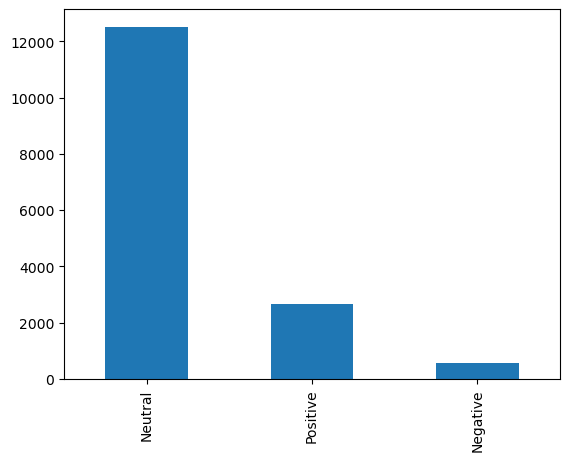

In [49]:
data["sentiment_textblob"].value_counts().plot(kind='bar')

## Subjevtivity

In [50]:
data.sentiment_textblob_sub.value_counts()

Neutral     12152
Positive     3592
Name: sentiment_textblob_sub, dtype: int64

<AxesSubplot:>

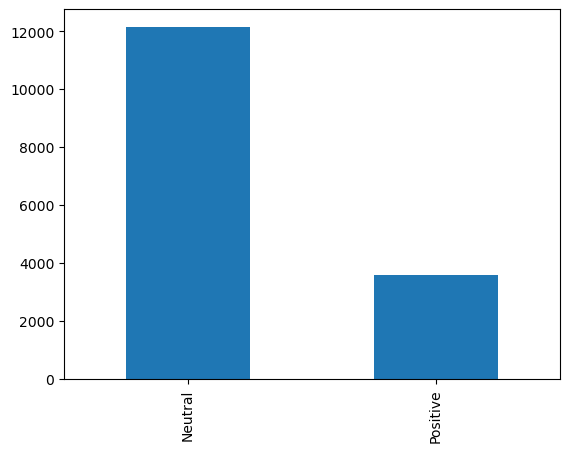

In [51]:
data["sentiment_textblob_sub"].value_counts().plot(kind='bar')

## Wordcloud

In [52]:
cleantext = data.iloc[:,1]

In [53]:
cleantext

NaN                     enna da ellam avan seyal  mari iruku
0.0                             movei like  ellam avan seyal
1.0         padam vanthathum k dislik pottavaga yellam ye...
2.0                   neraya neraya neraya  v era levelthala
3.0         wow thavala sema masspadam oru pundaikum aagathu
                                 ...                        
15738.0     ivaru cinemala laam nalla tha prasuraaruaana ...
15739.0          pattaya kilaputhupaa trailer  get rajnifi  
15740.0     en innum trend la varala ennada panringa yout...
15741.0              rajnik sir plz aap india ke pm ban jaao
15742.0     enagada youtub inum trend la add panama irukinga
Name: clean_text, Length: 15744, dtype: object

In [54]:
text = ' '.join(cleantext)
text

" enna da ellam avan seyal  mari iruku  movei like  ellam avan seyal  padam vanthathum k dislik pottavaga yellam yea da dislik  pannom nu feel pannanum  neraya neraya neraya  v era levelthala  wow thavala sema masspadam oru pundaikum aagathu  andha  k unlik panavangaluku kolandha porakathu  yaarellam frst like pottutu video paaka start paneengahit like  ethana padam vanthanu salt pepper mattum thanthãlã🤩🤩  thala mass  hvi sprt kerala surya anna fan  elam avan jayal movi  remak pa  dhayavasenju indha padathula mass ila mayiru ila nu yevanum saavadikadheenga let role healthi  vera lvl thala sammaaaaaaaaaaaaabgm sammaya iruku  romba nal aparam ajith ah normal ah pakaran siva oda build illama tharamana trailer  nirav shah   love u dear  padam hit nu nenaikkuravang like podung  naan pottutten  thevdiya pasangala intha trailer ku enna da kora evlo dislik uh punda mavanungala  dislik podura thevidiya kandara oooooooli pasangala  neenga viswasam ah irukkurathukku mathavangala yan asinga paduth

In [55]:
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
no_punc_text

' enna da ellam avan seyal  mari iruku  movei like  ellam avan seyal  padam vanthathum k dislik pottavaga yellam yea da dislik  pannom nu feel pannanum  neraya neraya neraya  v era levelthala  wow thavala sema masspadam oru pundaikum aagathu  andha  k unlik panavangaluku kolandha porakathu  yaarellam frst like pottutu video paaka start paneengahit like  ethana padam vanthanu salt pepper mattum thanthãlã🤩🤩  thala mass  hvi sprt kerala surya anna fan  elam avan jayal movi  remak pa  dhayavasenju indha padathula mass ila mayiru ila nu yevanum saavadikadheenga let role healthi  vera lvl thala sammaaaaaaaaaaaaabgm sammaya iruku  romba nal aparam ajith ah normal ah pakaran siva oda build illama tharamana trailer  nirav shah   love u dear  padam hit nu nenaikkuravang like podung  naan pottutten  thevdiya pasangala intha trailer ku enna da kora evlo dislik uh punda mavanungala  dislik podura thevidiya kandara oooooooli pasangala  neenga viswasam ah irukkurathukku mathavangala yan asinga paduth

In [56]:
import nltk
from nltk.tokenize import word_tokenize
# nltk.download('punkt')
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['enna', 'da', 'ellam', 'avan', 'seyal', 'mari', 'iruku', 'movei', 'like', 'ellam', 'avan', 'seyal', 'padam', 'vanthathum', 'k', 'dislik', 'pottavaga', 'yellam', 'yea', 'da', 'dislik', 'pannom', 'nu', 'feel', 'pannanum', 'neraya', 'neraya', 'neraya', 'v', 'era', 'levelthala', 'wow', 'thavala', 'sema', 'masspadam', 'oru', 'pundaikum', 'aagathu', 'andha', 'k', 'unlik', 'panavangaluku', 'kolandha', 'porakathu', 'yaarellam', 'frst', 'like', 'pottutu', 'video', 'paaka']


In [57]:
len(text_tokens)
#Remove stopwords
import nltk
from nltk.corpus import stopwords
# nltk.download('punkt')
nltk.download('stopwords')
my_stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Priya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['enna', 'da', 'ellam', 'avan', 'seyal', 'mari', 'iruku', 'movei', 'like', 'ellam', 'avan', 'seyal', 'padam', 'vanthathum', 'k', 'dislik', 'pottavaga', 'yellam', 'yea', 'da', 'dislik', 'pannom', 'nu', 'feel', 'pannanum', 'neraya', 'neraya', 'neraya', 'v', 'era', 'levelthala', 'wow', 'thavala', 'sema', 'masspadam', 'oru', 'pundaikum', 'aagathu', 'andha', 'k']


In [59]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [60]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:25])

enna da ellam avan seyal mari iruku movei like ellam avan seyal padam vanthathum k dislik pottavaga yellam yea da dislik pannom nu feel pannanum


In [61]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['enna', 'da', 'ellam', 'avan', 'seyal', 'mari', 'iruku', 'movei', 'like', 'ellam', 'avan', 'seyal', 'padam', 'vanthathum', 'k', 'dislik', 'pottavaga', 'yellam', 'yea', 'da', 'dislik', 'pannom', 'nu', 'feel', 'pannanum']


In [62]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [63]:
print(vectorizer.vocabulary_)

{'enna': 4064, 'da': 3000, 'ellam': 3885, 'avan': 1735, 'seyal': 17117, 'mari': 9659, 'iruku': 6287, 'movei': 10336, 'like': 9010, 'padam': 12543, 'vanthathum': 20875, 'dislik': 3429, 'pottavaga': 15271, 'yellam': 22888, 'yea': 22834, 'pannom': 13387, 'nu': 11774, 'feel': 4742, 'pannanum': 13245, 'neraya': 11483, 'era': 4300, 'levelthala': 8979, 'wow': 22533, 'thavala': 19184, 'sema': 16889, 'masspadam': 9765, 'oru': 12086, 'pundaikum': 15612, 'aagathu': 87, 'andha': 1125, 'unlik': 20210, 'panavangaluku': 13076, 'kolandha': 8325, 'porakathu': 15046, 'yaarellam': 22600, 'frst': 4860, 'pottutu': 15302, 'video': 21885, 'paaka': 12255, 'start': 17935, 'paneengahit': 13143, 'ethana': 4451, 'vanthanu': 20870, 'salt': 16404, 'pepper': 14193, 'mattum': 9958, 'thanthãlã': 19090, 'thala': 18634, 'mass': 9728, 'hvi': 5405, 'sprt': 17887, 'kerala': 8003, 'surya': 18203, 'anna': 1180, 'fan': 4673, 'elam': 3858, 'jayal': 6744, 'movi': 10339, 'remak': 16056, 'pa': 12215, 'dhayavasenju': 3319, 'indha'

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

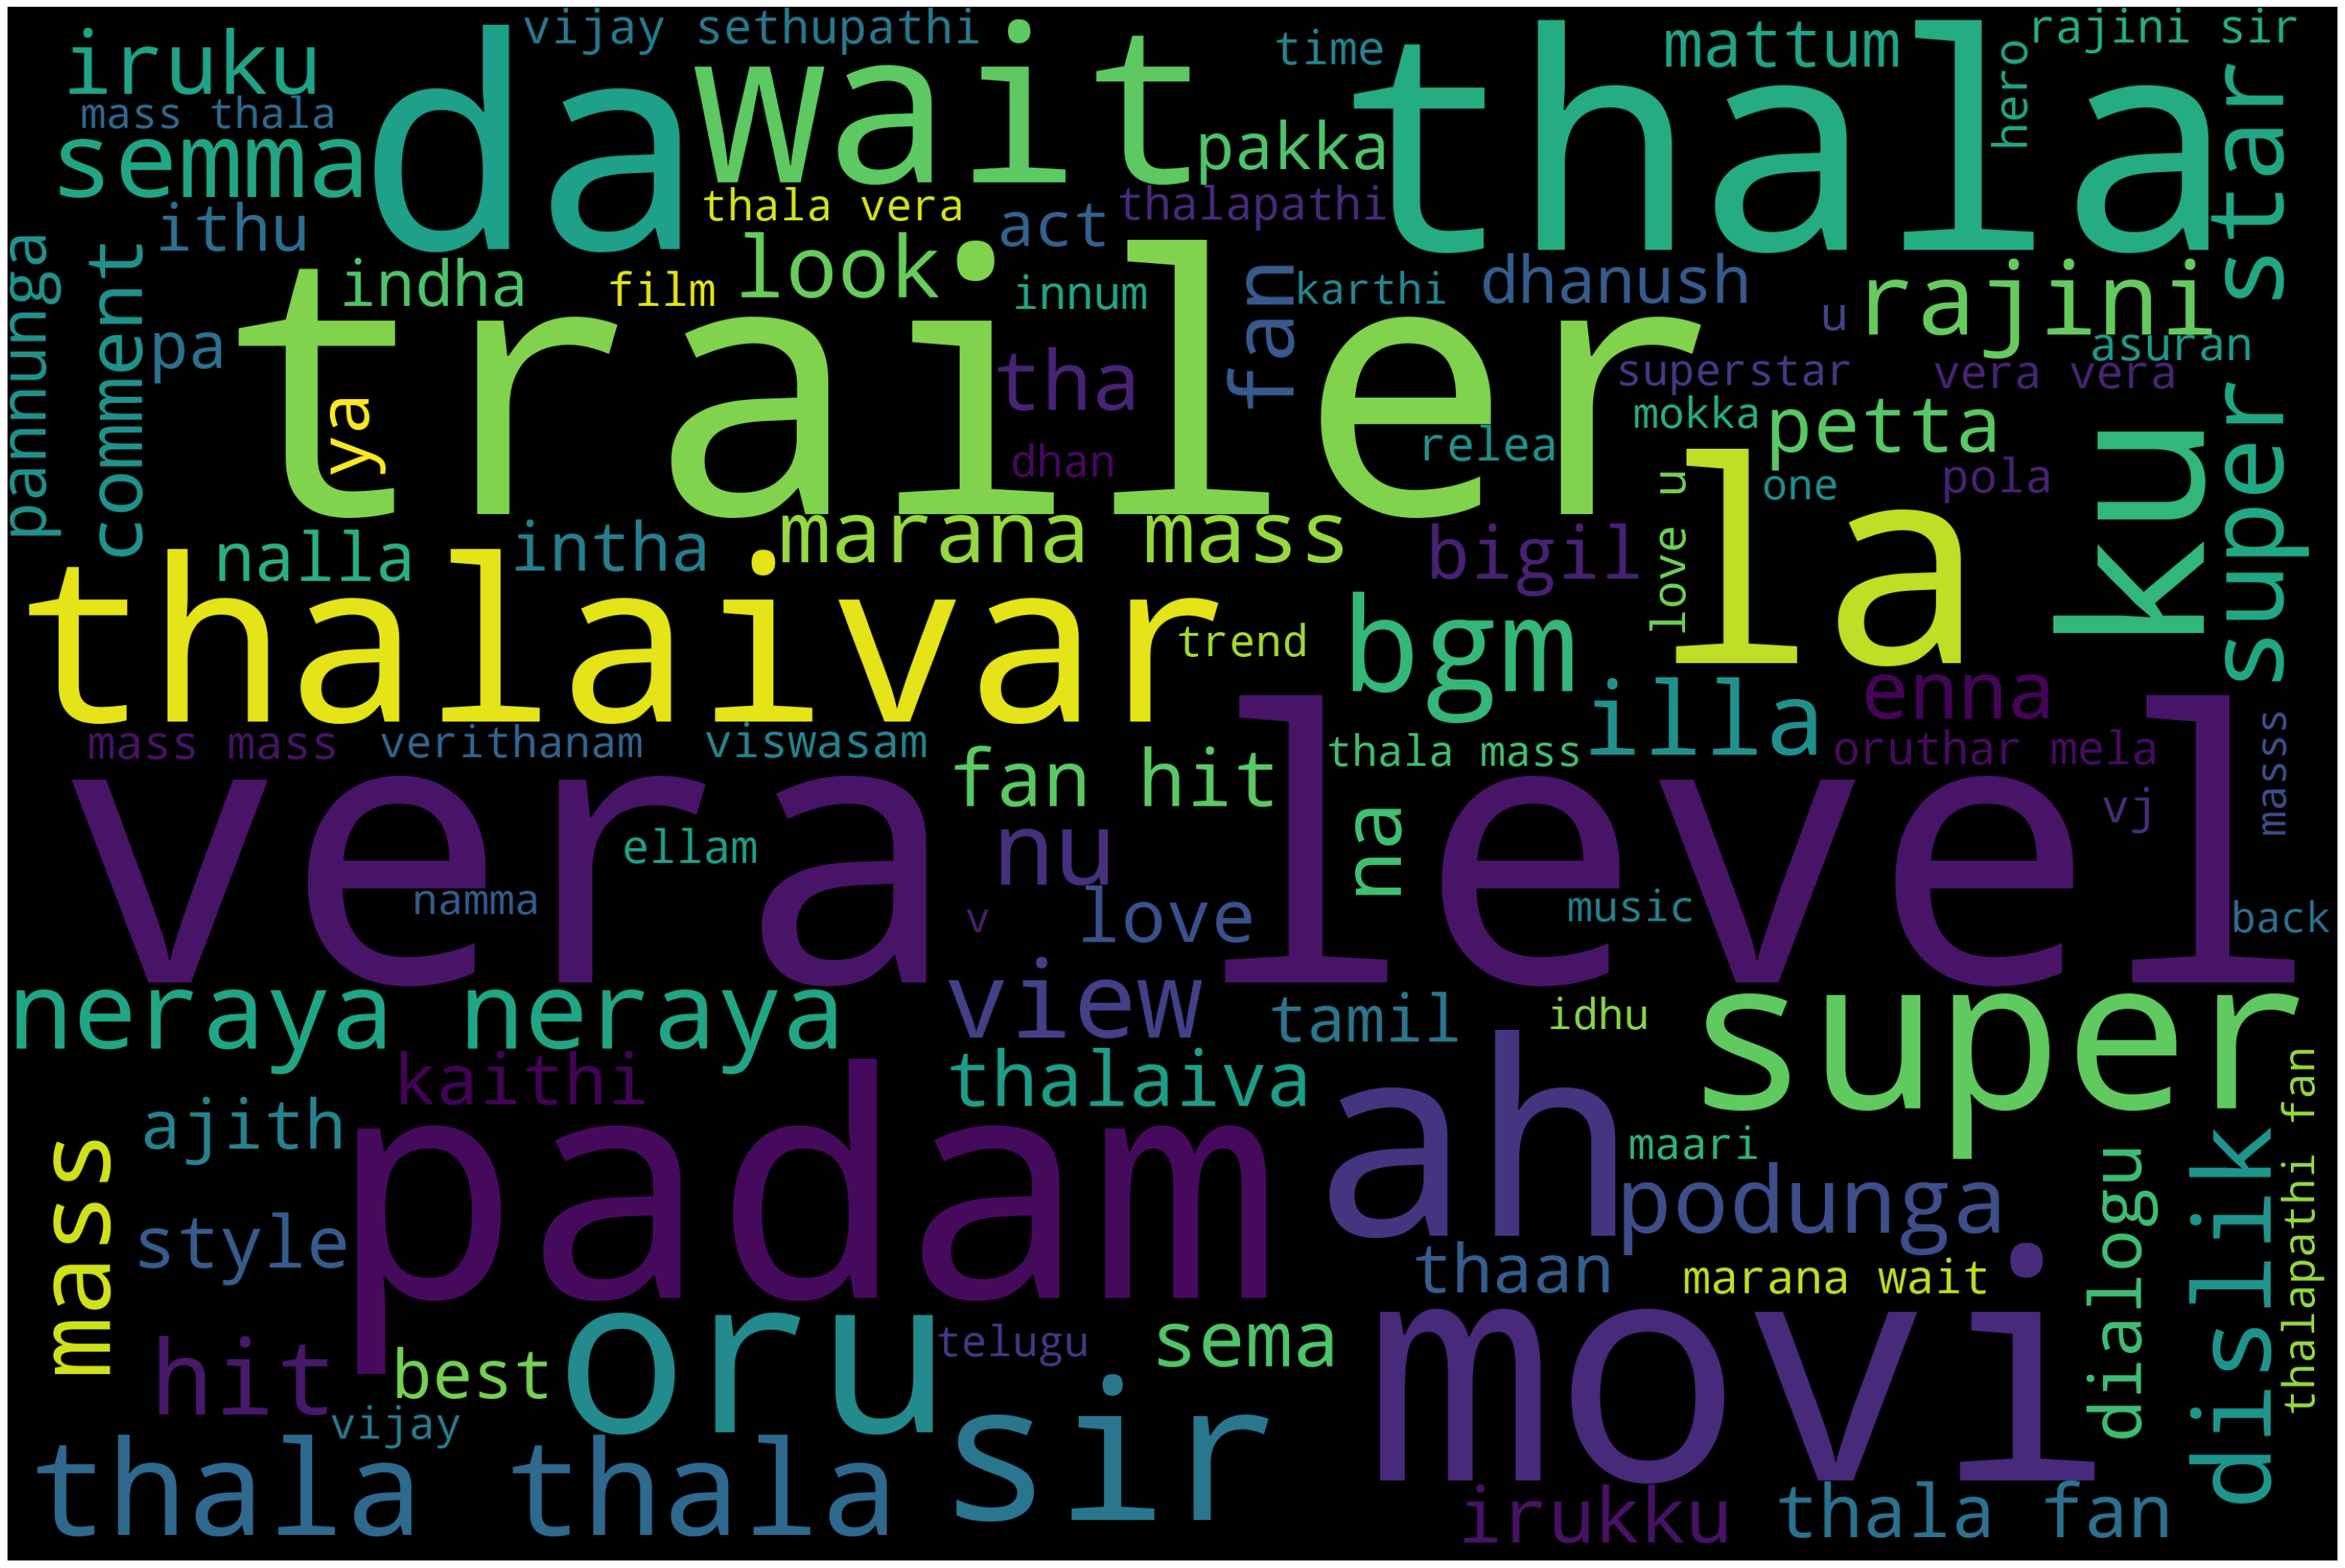

In [65]:
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100).generate(text)
# Plot
plot_cloud(wordcloud)

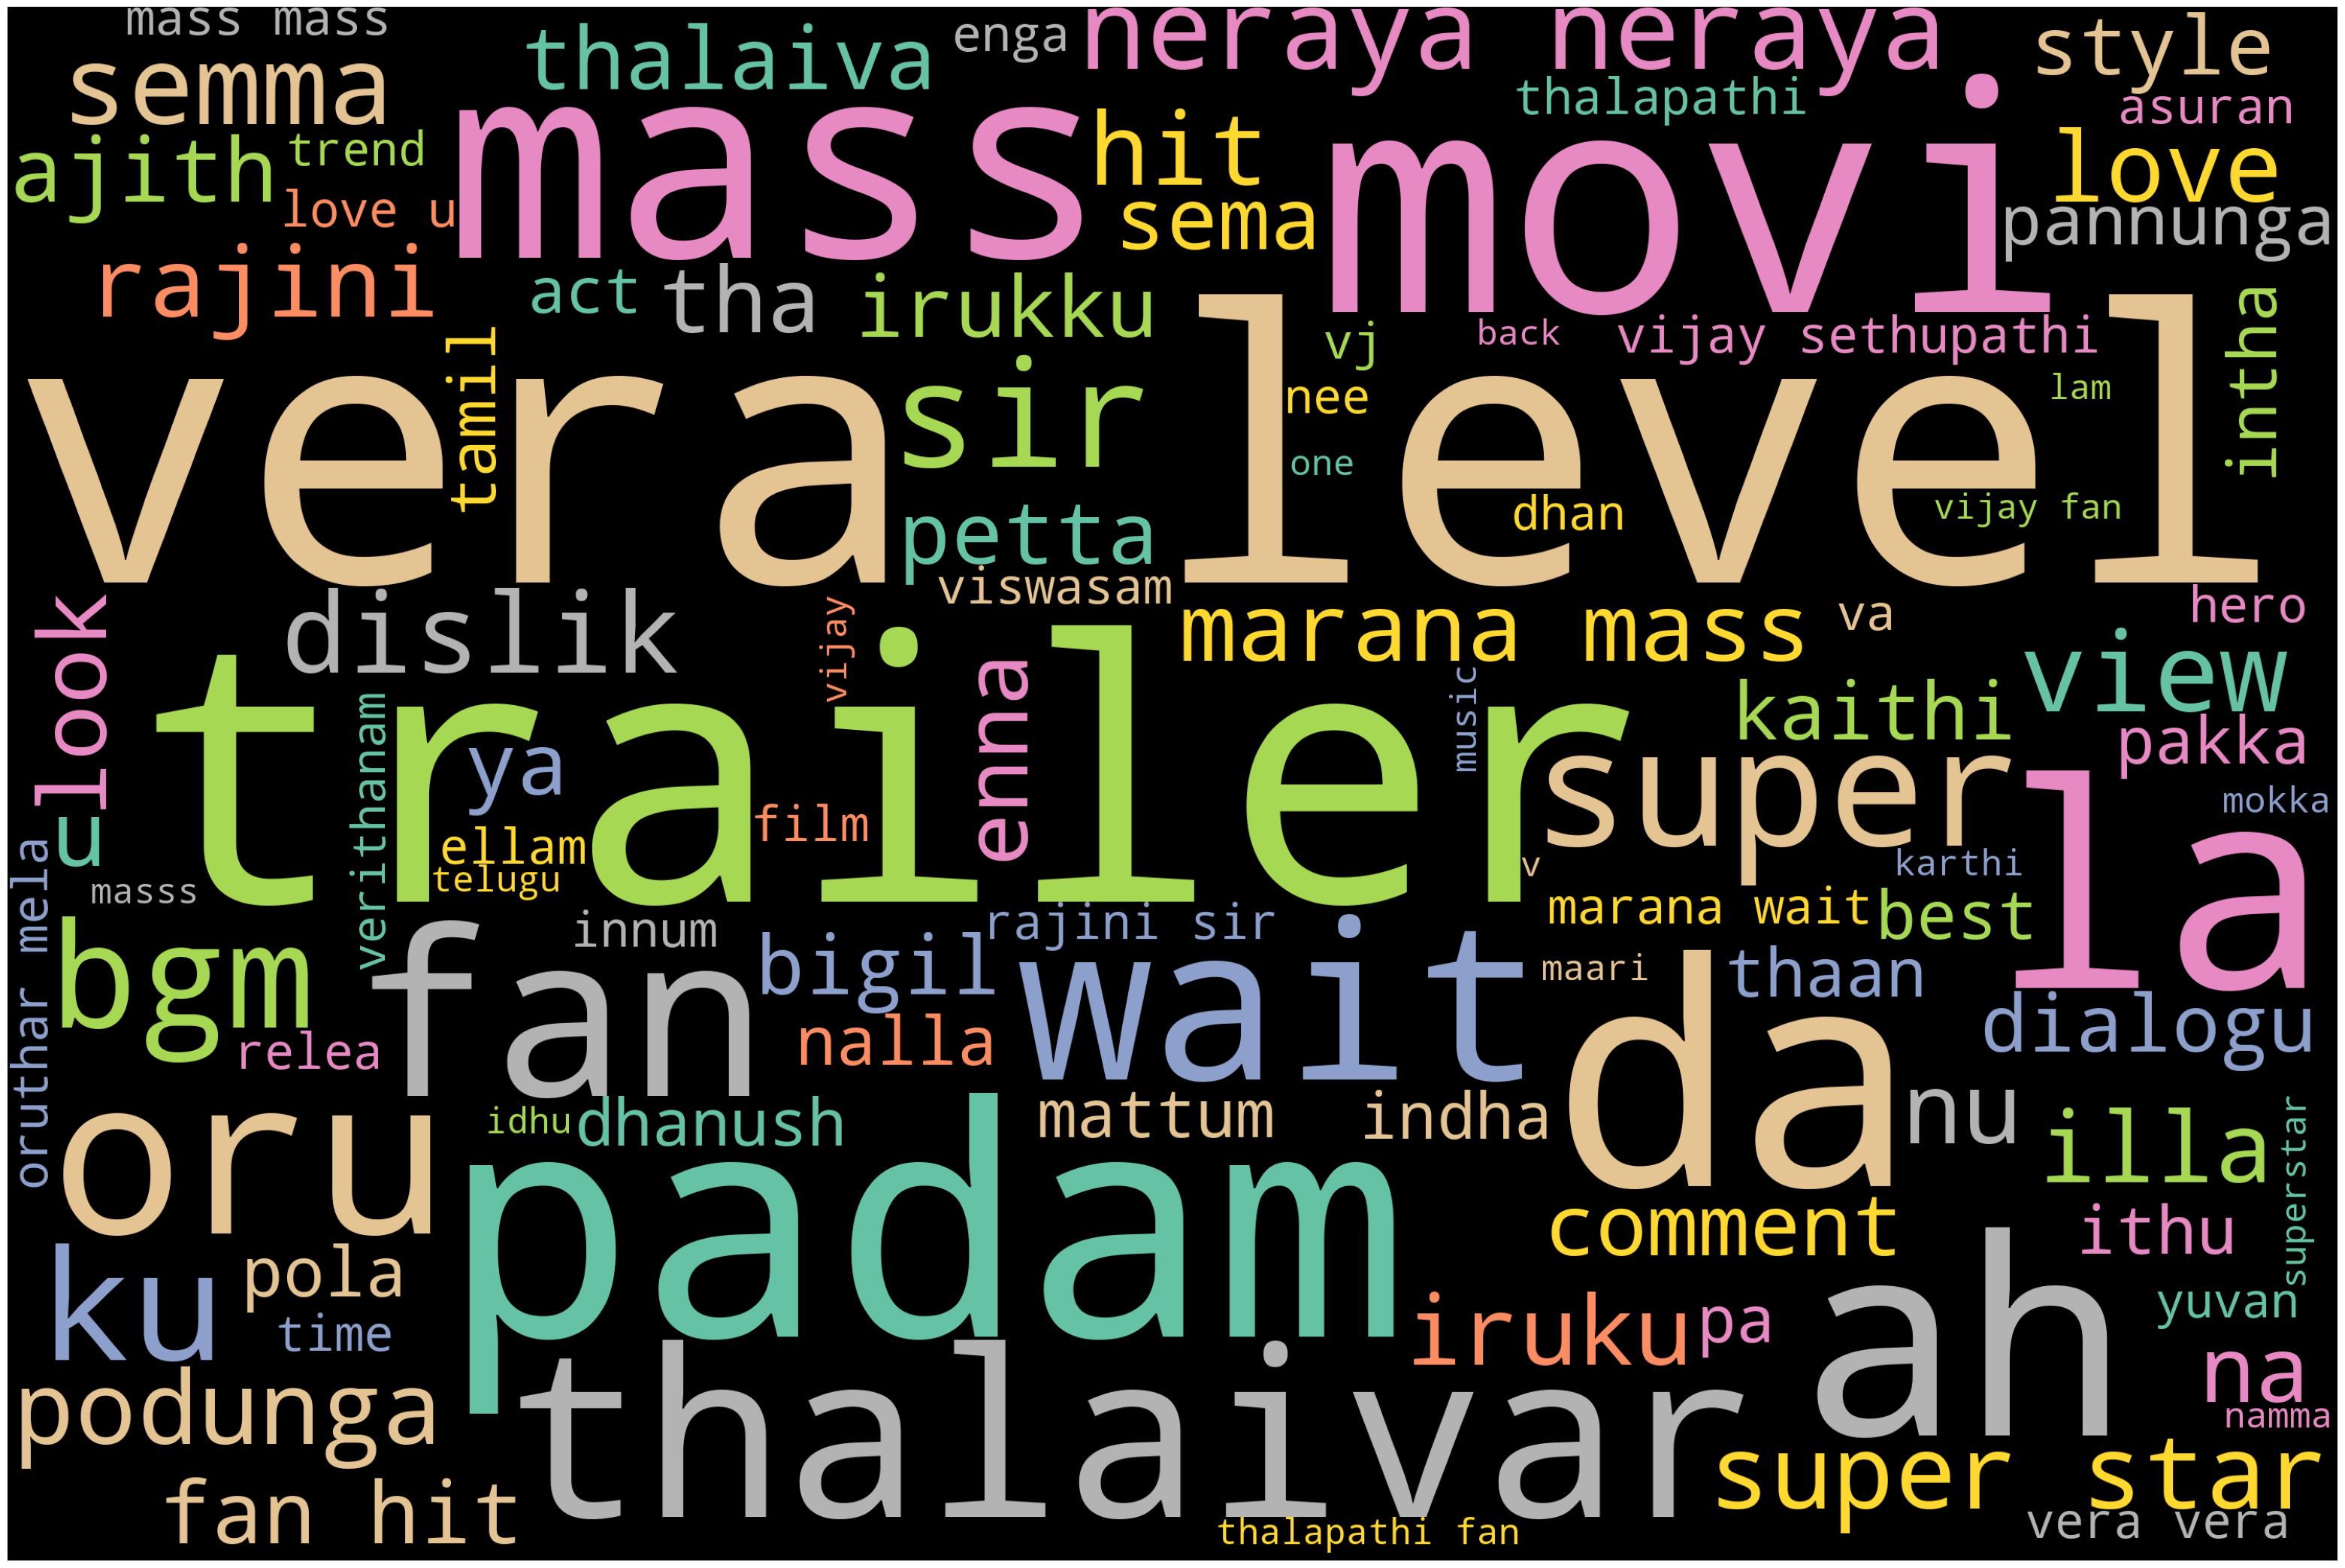

In [66]:
stopwords = STOPWORDS
stopwords.add('Thala')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [67]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[-25:])

['innum', 'trend', 'la', 'varala', 'ennada', 'panringa', 'youtub', 'fellow', 'rajnik', 'sir', 'plz', 'aap', 'india', 'ke', 'pm', 'ban', 'jaao', 'enagada', 'youtub', 'inum', 'trend', 'la', 'add', 'panama', 'irukinga']


### BERT

In [1]:
# Transformers installation
! pip install transformers
# To install from source instead of the last release, comment the command above and uncomment the following one.
# ! pip install git+https://github.com/huggingface/transformers.git

In [36]:
from transformers import pipeline
classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceCla

In [38]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("Vasanth/tamil-sentiment-distilbert")

model = AutoModelForSequenceClassification.from_pretrained("Vasanth/tamil-sentiment-distilbert")

ImportError: 
AutoModelForSequenceClassification requires the PyTorch library but it was not found in your environment.
However, we were able to find a TensorFlow installation. TensorFlow classes begin
with "TF", but are otherwise identically named to our PyTorch classes. This
means that the TF equivalent of the class you tried to import would be "TFAutoModelForSequenceClassification".
If you want to use TensorFlow, please use TF classes instead!

If you really do want to use PyTorch please go to
https://pytorch.org/get-started/locally/ and follow the instructions that
match your environment.


In [39]:
classifier = pipeline('sentiment-analysis', model="Vasanth/tamil-sentiment-distilbert")

C:\Users\Priya\anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Priya\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


ValueError: Could not load model Vasanth/tamil-sentiment-distilbert with any of the following classes: (<class 'transformers.models.auto.modeling_tf_auto.TFAutoModelForSequenceClassification'>, <class 'transformers.models.distilbert.modeling_tf_distilbert.TFDistilBertForSequenceClassification'>).

In [40]:
classifier("Vera level")

[{'label': 'POSITIVE', 'score': 0.9991300702095032}]

In [41]:
col_list = data["Lemma_text"].values.tolist()
print(col_list)

['  enna da ellam avan seyal mari iruku', '  movei like ellam avan seyal', '  padam vanthathum k dislik pottavaga yellam yea da dislik pannom nu feel pannanum', '  neraya neraya neraya v era levelthala', '  wow thavala sema masspadam oru pundaikum aagathu', '  andha k unlik panavangaluku kolandha porakathu', '  yaarellam frst like pottutu video paaka start paneengahit like', '  ethana padam vanthanu salt pepper mattum thanthãlã🤩🤩', '  thala mass hvi sprt kerala surya anna fan', '  elam avan jayal movi remak pa', '  dhayavasenju indha padathula mass ila mayiru ila nu yevanum saavadikadheenga let role healthi', '  vera lvl thala sammaaaaaaaaaaaaabgm sammaya iruku', '  romba nal aparam ajith ah normal ah pakaran siva oda build illama tharamana trailer', '  nirav shah love u dear', '  padam hit nu nenaikkuravang like podung naan pottutten', '  thevdiya pasangala intha trailer ku enna da kora evlo dislik uh punda mavanungala', '  dislik podura thevidiya kandara oooooooli pasangala', '  neen

In [45]:
col_list

['  enna da ellam avan seyal mari iruku',
 '  movei like ellam avan seyal',
 '  padam vanthathum k dislik pottavaga yellam yea da dislik pannom nu feel pannanum',
 '  neraya neraya neraya v era levelthala',
 '  wow thavala sema masspadam oru pundaikum aagathu',
 '  andha k unlik panavangaluku kolandha porakathu',
 '  yaarellam frst like pottutu video paaka start paneengahit like',
 '  ethana padam vanthanu salt pepper mattum thanthãlã🤩🤩',
 '  thala mass hvi sprt kerala surya anna fan',
 '  elam avan jayal movi remak pa',
 '  dhayavasenju indha padathula mass ila mayiru ila nu yevanum saavadikadheenga let role healthi',
 '  vera lvl thala sammaaaaaaaaaaaaabgm sammaya iruku',
 '  romba nal aparam ajith ah normal ah pakaran siva oda build illama tharamana trailer',
 '  nirav shah love u dear',
 '  padam hit nu nenaikkuravang like podung naan pottutten',
 '  thevdiya pasangala intha trailer ku enna da kora evlo dislik uh punda mavanungala',
 '  dislik podura thevidiya kandara oooooooli pas

In [46]:
col = col_list[0:5]

In [47]:
col

['  enna da ellam avan seyal mari iruku',
 '  movei like ellam avan seyal',
 '  padam vanthathum k dislik pottavaga yellam yea da dislik pannom nu feel pannanum',
 '  neraya neraya neraya v era levelthala',
 '  wow thavala sema masspadam oru pundaikum aagathu']

In [ ]:
classifier(col_list)